insert header

# Title

## Business Understanding and Business Problem

### Cost of Errors

## Data Understanding

In [75]:
#imports grabbed from lecture
from random import gauss as gs, uniform as uni, seed
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from surprise import Reader, Dataset

from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

### Initial Data

In [36]:
#the four csv files provided
links_df = pd.read_csv('data/links.csv')
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

In [78]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [79]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [80]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [82]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
 4   tag_clean  3683 non-null   object
dtypes: int64(3), object(2)
memory usage: 144.0+ KB


## Exploratory Data Analysis

In [41]:
simple_ratings_df = ratings_df.drop('timestamp', axis=1)

In [42]:
simple_ratings_df.head(5)

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [43]:
simple_ratings_df.info(), simple_ratings_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


(None,
 userId     0
 movieId    0
 rating     0
 dtype: int64)

In [44]:
# reader = Reader()
# data = Dataset.load_from_df(simple_ratings_df,reader)

In [45]:
# dataset = data.build_full_trainset()
# print('Number of users: ', dataset.n_users, '\n')
# print('Number of items: ', dataset.n_items)

## Modeling

In [46]:
# params = {'n_factors': [20, 50, 100],
#          'reg_all': [0.02, 0.05, 0.1]}
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
# g_s_svd.fit(data)

In [47]:
# print(g_s_svd.best_score)
# print(g_s_svd.best_params)

In [48]:
# # cross validating with KNNBasic
# knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
# cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

In [49]:

# for i in cv_knn_basic.items():
#     print(i)
# print('-----------------------')
# print(np.mean(cv_knn_basic['test_rmse']))

In [50]:
# # cross validating with KNNBaseline
# knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
# cv_knn_baseline = cross_validate(knn_baseline,data)

In [51]:
# for i in cv_knn_baseline.items():
#     print(i)

# np.mean(cv_knn_baseline['test_rmse'])

## SPLIT GENRE

In [52]:
movies_df.head(1)

movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy

In [53]:
genres_df = movies_df[['movieId', 'genres']]
genres_df.head(1)

movieId                                       genres
0        1  Adventure|Animation|Children|Comedy|Fantasy

In [54]:
genres_df['genres'][0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [55]:
genres_df['genres'][0]

'Adventure|Animation|Children|Comedy|Fantasy'

In [56]:

# # Split single column into two columns use apply()
# df[['First Name', 'Last Name']] = df["Student_details"].apply(lambda x: pd.Series(str(x).split(",")))
# print(df)


In [57]:
genres_df['split_genres'] = genres_df['genres'].iloc[0:].apply(lambda x: x.lower().split('|'))
genres_df.head()

movieId                                       genres  \
0        1  Adventure|Animation|Children|Comedy|Fantasy   
1        2                   Adventure|Children|Fantasy   
2        3                               Comedy|Romance   
3        4                         Comedy|Drama|Romance   
4        5                                       Comedy   

                                        split_genres  
0  [adventure, animation, children, comedy, fantasy]  
1                     [adventure, children, fantasy]  
2                                  [comedy, romance]  
3                           [comedy, drama, romance]  
4                                           [comedy]

In [58]:
# genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split('|'))
# genres_df['genres'].head()

## CLEAN TAGS

In [59]:
tags_df.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [60]:
tags_df['tag_clean'] = tags_df['tag'].iloc[0:].apply(lambda x: x.lower().replace(' ', ''))
tags_df['tag_clean'].head()

0             funny
1    highlyquotable
2       willferrell
3       boxingstory
4               mma
Name: tag_clean, dtype: object

In [61]:
tags_df['tag_clean'].value_counts()

innetflixqueue       131
atmospheric           41
superhero             24
thought-provoking     24
funny                 24
                    ... 
wine                   1
statue                 1
badhumor               1
1960s                  1
bigbrothers            1
Name: tag_clean, Length: 1471, dtype: int64

## Combining some columns to use

In [62]:
# I can remove timestamp, will join on movieId
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [63]:
ratings_df_clean = ratings_df.drop('timestamp', axis=1)
ratings_df_clean.head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [64]:
#can remove tag, timestamp
tags_df.head()

userId  movieId              tag   timestamp       tag_clean
0       2    60756            funny  1445714994           funny
1       2    60756  Highly quotable  1445714996  highlyquotable
2       2    60756     will ferrell  1445714992     willferrell
3       2    89774     Boxing story  1445715207     boxingstory
4       2    89774              MMA  1445715200             mma

In [65]:
tags_df_clean = tags_df.drop(['tag', 'timestamp'], axis=1)
tags_df_clean.head()

userId  movieId       tag_clean
0       2    60756           funny
1       2    60756  highlyquotable
2       2    60756     willferrell
3       2    89774     boxingstory
4       2    89774             mma

In [66]:
# can remove genres
genres_df.head()

movieId                                       genres  \
0        1  Adventure|Animation|Children|Comedy|Fantasy   
1        2                   Adventure|Children|Fantasy   
2        3                               Comedy|Romance   
3        4                         Comedy|Drama|Romance   
4        5                                       Comedy   

                                        split_genres  
0  [adventure, animation, children, comedy, fantasy]  
1                     [adventure, children, fantasy]  
2                                  [comedy, romance]  
3                           [comedy, drama, romance]  
4                                           [comedy]

In [67]:
genres_df_clean = genres_df.drop('genres', axis=1)
genres_df_clean.head()

movieId                                       split_genres
0        1  [adventure, animation, children, comedy, fantasy]
1        2                     [adventure, children, fantasy]
2        3                                  [comedy, romance]
3        4                           [comedy, drama, romance]
4        5                                           [comedy]

In [70]:
#merging
genre_rating_df = genres_df_clean.merge(ratings_df_clean, how='outer', on='movieId')
genre_rating_df

movieId                                       split_genres  userId  \
0             1  [adventure, animation, children, comedy, fantasy]     1.0   
1             1  [adventure, animation, children, comedy, fantasy]     5.0   
2             1  [adventure, animation, children, comedy, fantasy]     7.0   
3             1  [adventure, animation, children, comedy, fantasy]    15.0   
4             1  [adventure, animation, children, comedy, fantasy]    17.0   
...         ...                                                ...     ...   
100849   193581               [action, animation, comedy, fantasy]   184.0   
100850   193583                       [animation, comedy, fantasy]   184.0   
100851   193585                                            [drama]   184.0   
100852   193587                                [action, animation]   184.0   
100853   193609                                           [comedy]   331.0   

        rating  
0          4.0  
1          4.0  
2          4.5  
3          2.5  
4          4.5  
...        ...  
100849     4.0  
100850     3.5  
100851     3.5  
100852     3.5  
100853     4.0  

[100854 rows x 4 columns]

In [83]:
genre_rating_df.isna().sum()

movieId          0
split_genres     0
userId          18
rating          18
dtype: int64

In [84]:
genre_rating_df.dropna(inplace=True)

## Transform Dataset into a Network Graph using NetworkX

In [85]:
import networkx as nx

G = nx.Graph()
for row in genre_rating_df.index:
    movie = genre_rating_df.movieId[row]
    user = genre_rating_df.userId[row]
    rating = genre_rating_df.rating[row]
    G.add_edge(movie, user, weight=rating)
print(len(G.nodes))

9811


### Initial Graph Viz

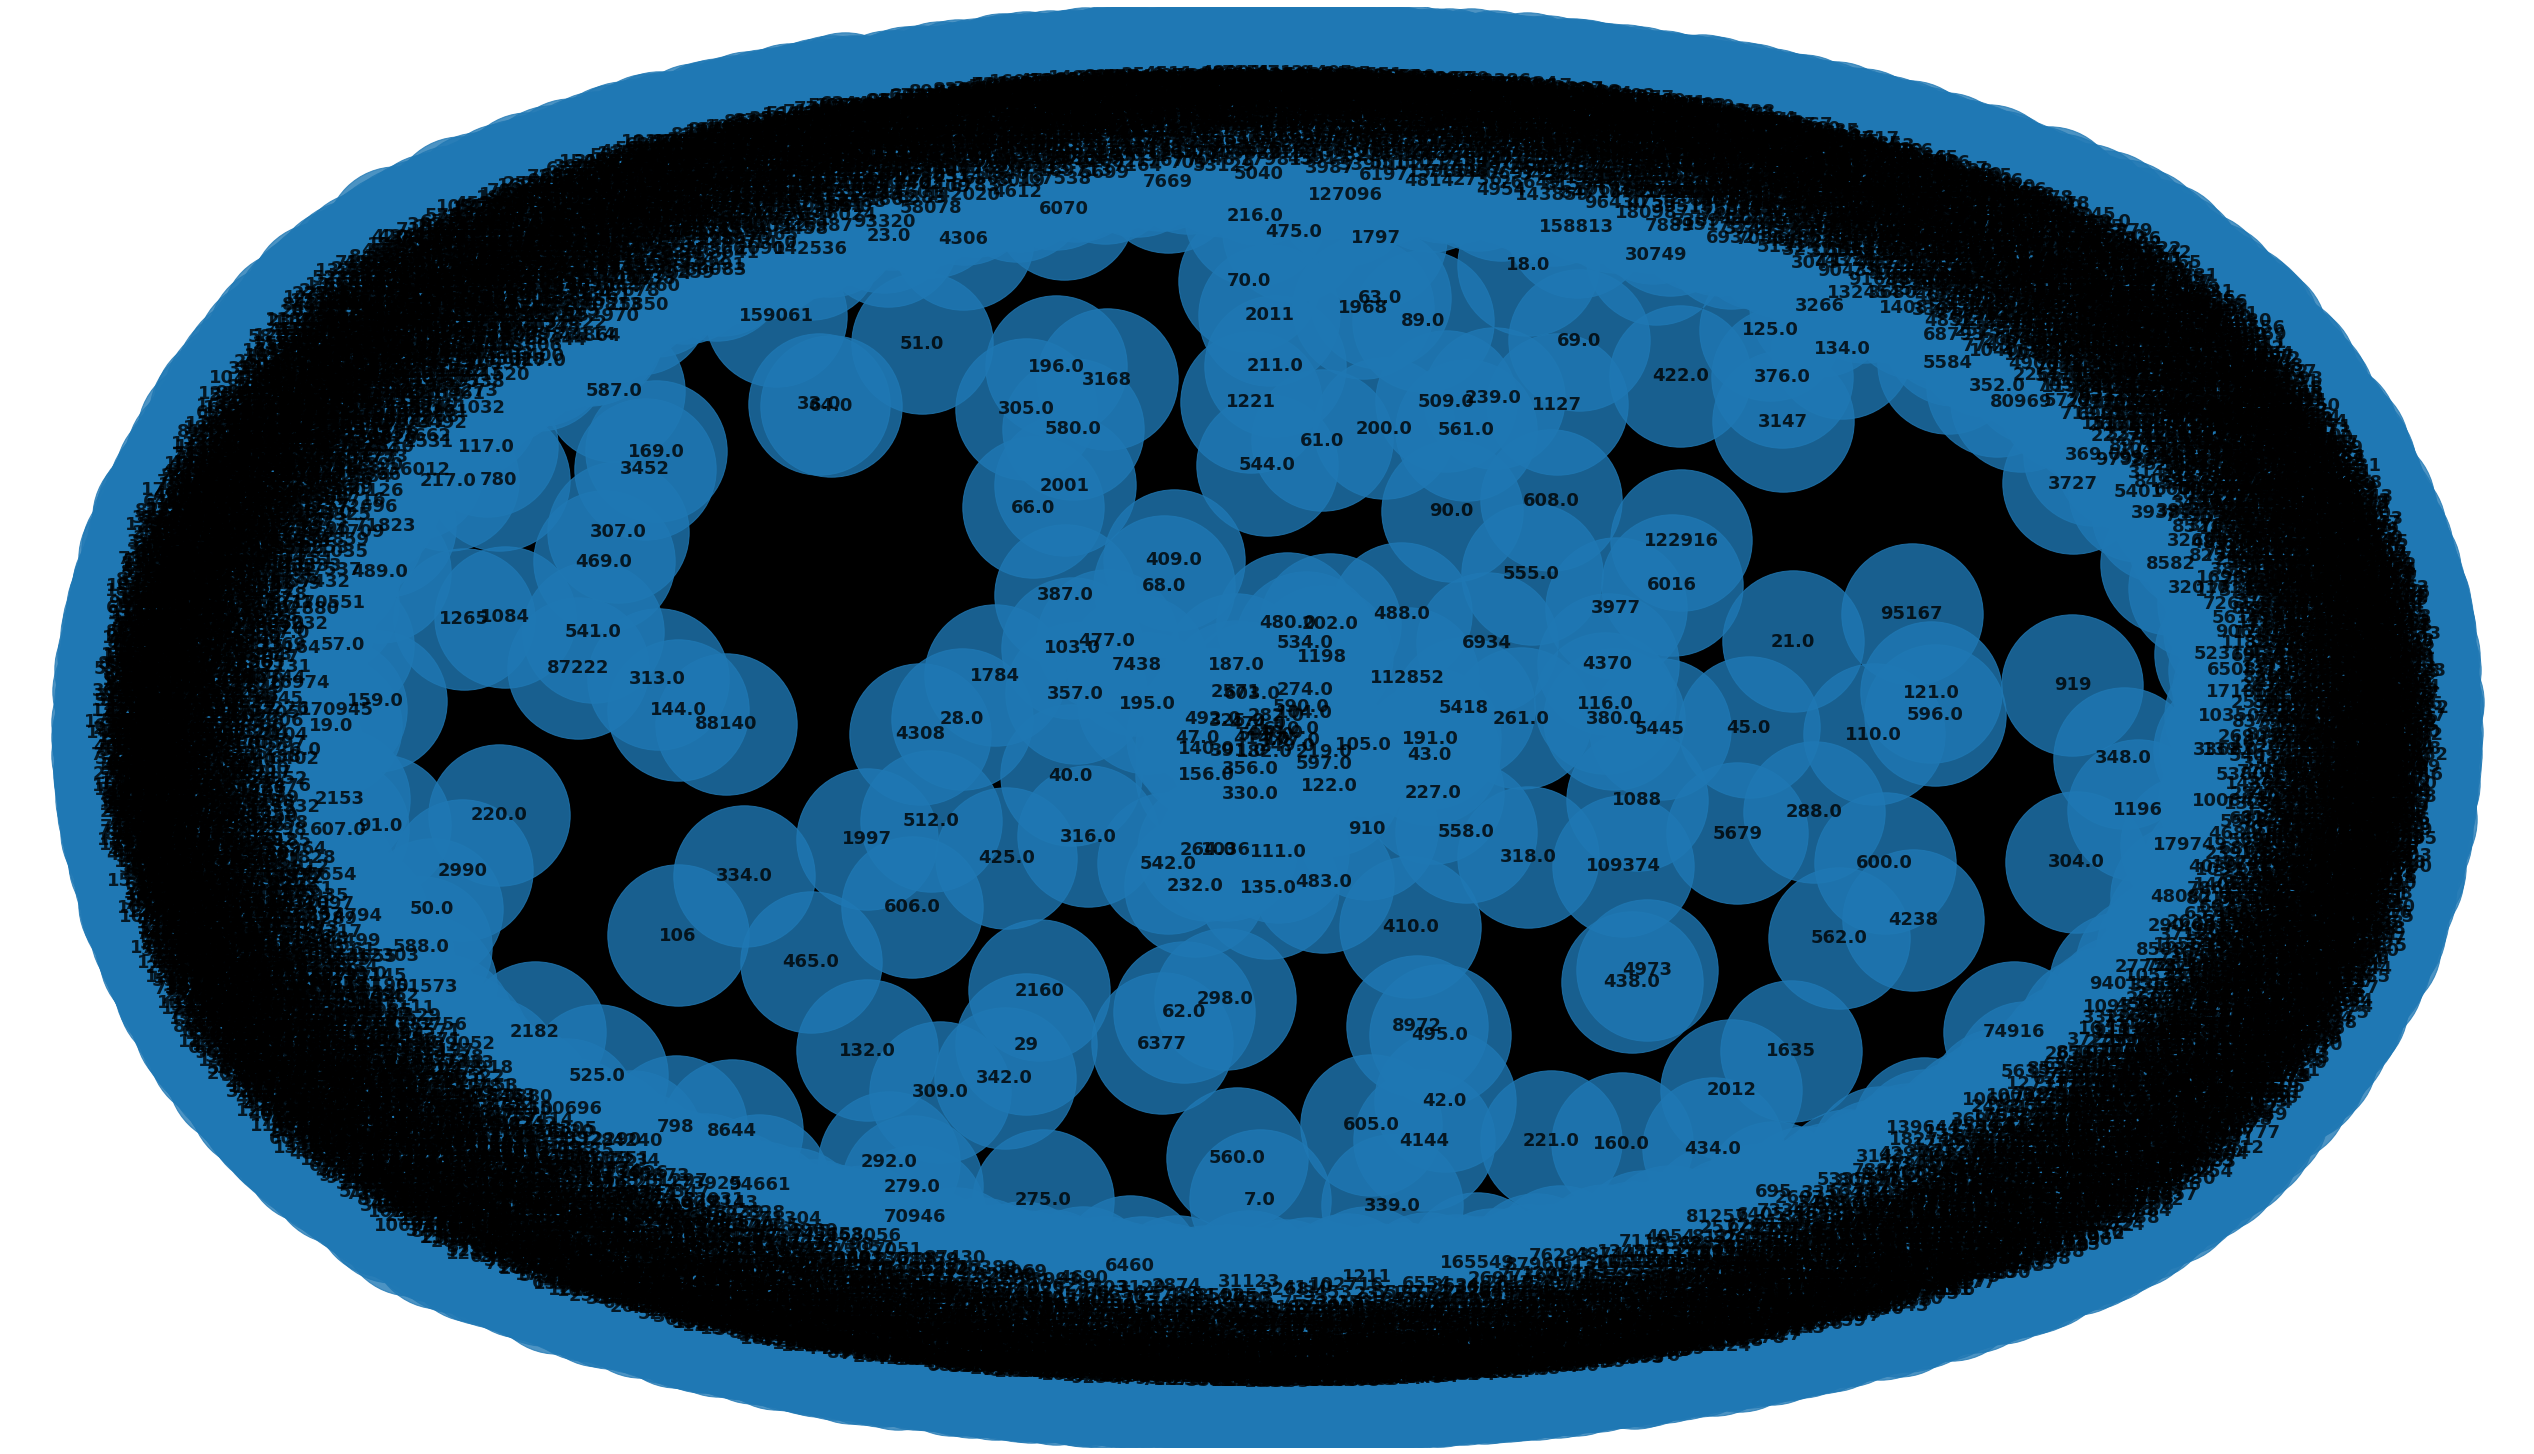

In [86]:
plt.figure(figsize=(35,20))
nx.draw(G, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True,
        alpha=.8, node_size=20000, font_weight='bold', font_size=18)

In [88]:
#refining visual
for i in range(0,100,5):
    print('{}th percentile: {}'.format(i,genre_rating_df.rating.quantile(q=i/100)))

0th percentile: 0.5
5th percentile: 1.5
10th percentile: 2.0
15th percentile: 2.5
20th percentile: 3.0
25th percentile: 3.0
30th percentile: 3.0
35th percentile: 3.0
40th percentile: 3.5
45th percentile: 3.5
50th percentile: 3.5
55th percentile: 4.0
60th percentile: 4.0
65th percentile: 4.0
70th percentile: 4.0
75th percentile: 4.0
80th percentile: 4.5
85th percentile: 4.5
90th percentile: 5.0
95th percentile: 5.0


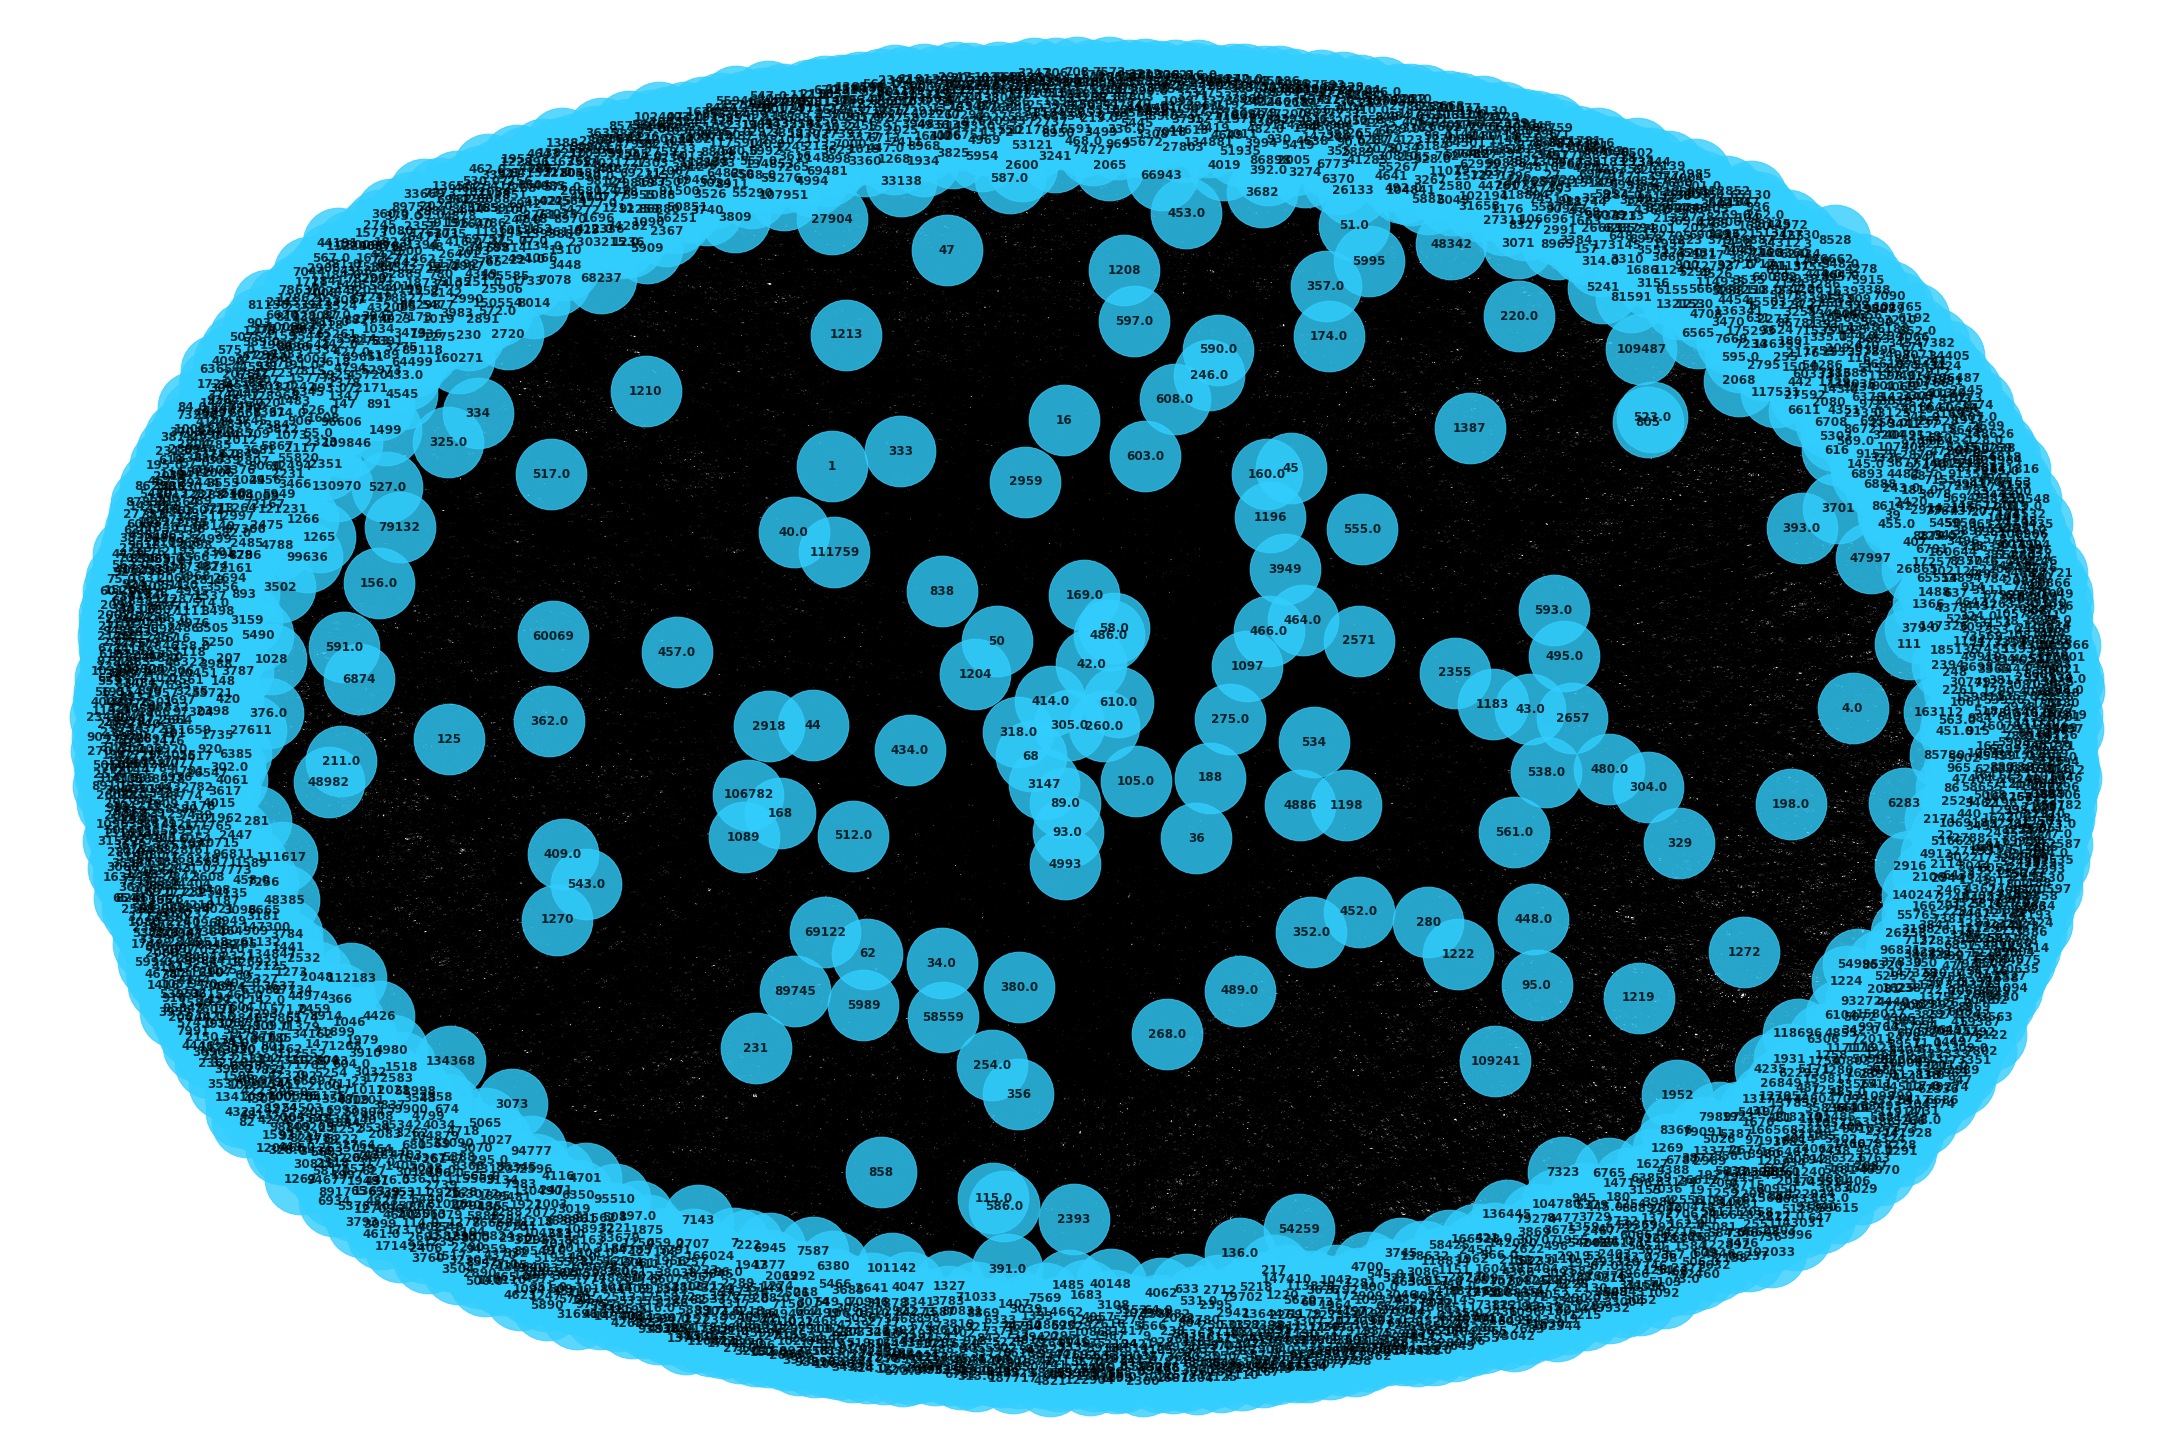

In [95]:
threshold = 4.5
G_subset = nx.Graph()
for row in genre_rating_df.index:
    movie = genre_rating_df.movieId[row]
    user = genre_rating_df.userId[row]
    rating = genre_rating_df.rating[row]
    if rating > threshold:
        G_subset.add_edge(movie, user, weight=rating)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
        alpha=.8, node_color='#32cefe', node_size=5000,
        with_labels=True, font_size=12, font_weight='bold')

In [96]:
len(G_subset)

3241

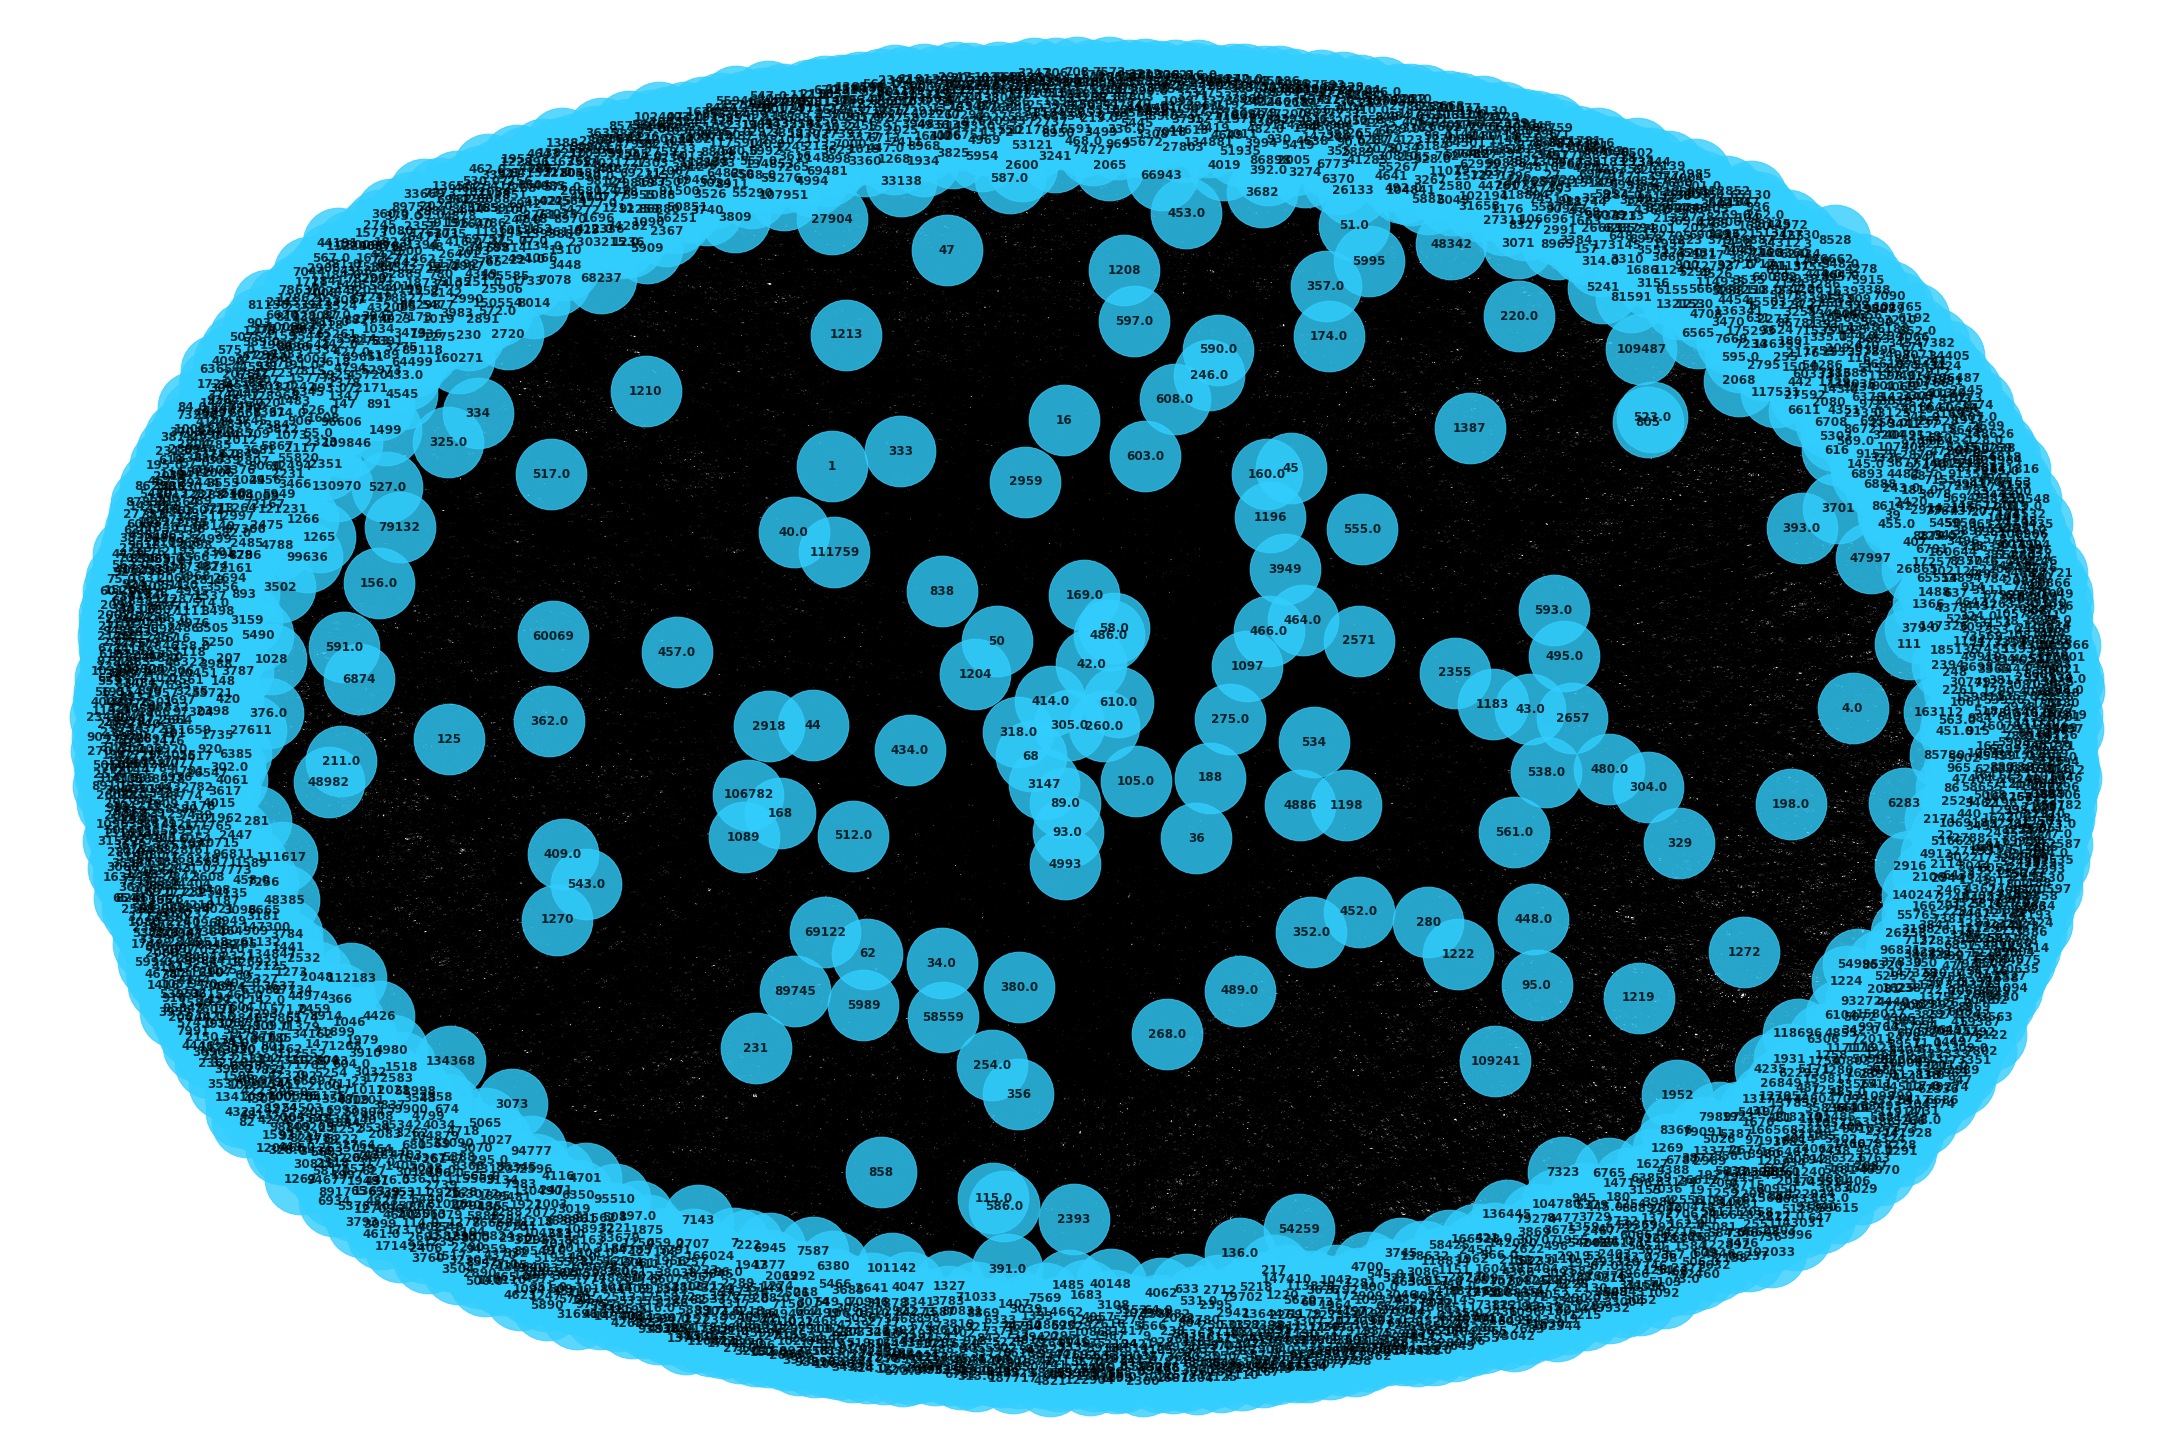

In [98]:
threshold = 4.9
G_subset = nx.Graph()
for row in genre_rating_df.index:
    movie = genre_rating_df.movieId[row]
    user = genre_rating_df.userId[row]
    rating = genre_rating_df.rating[row]
    if rating > threshold:
        G_subset.add_edge(movie, user, weight=rating)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
        alpha=.8, node_color='#32cefe', node_size=5000,
        with_labels=True, font_size=12, font_weight='bold')

In [99]:
len(G_subset)

3241

In [97]:
# clustering the network
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
for n, clusters in enumerate(gn_clusters):
    print('After removing {} edges, there are {} clusters.'.format(n, len(clusters)))

KeyboardInterrupt: 

## Final Model

## Results/Conclusions

### Further Exploration/Questions